# Prediction of Heart Disease

In this project, we build a Machine Learning (ML) model that is capable of predicting whether a person has heart disease or not, using the medical attributes of the person. Thus, we have a binary classification problem at hand and we solve it via supervised Machine Learning.

## Data

The dataset to train and test the model is taken from the `UC Irvine Machine Learning Repository`. We shall use the Cleveland dataset (https://archive.ics.uci.edu/dataset/45/heart+disease), which has the following medical attributes:

* `age`: age in years.
* `sex`: biological sex.
    * value 1 = male
    * value 0 = female
* `cp`: chest pain type.
    * value 1 = typical angina
    * value 2 = atypical angina
    * value 3 = non-anginal pain
    * value 4 = asymptomatic
* `trestbps`: resting blood pressure in mm Hg on admission to the hospital.
* `chol`: serum cholestoral in mg/dl.
* `fbs`: fasting blood sugar > 120 mg/dl.
    * value 1 = true
    * value 0 = false
* `restecg`: resting electrocardiographic results.
    * value 0 = normal
    * value 1 = having ST-T wave abnormality
    * value 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
* `thalach`: maximum heart rate achieved.
* `exang`: exercise induced angina.
    * value 1 = yes
    * value 0 = no
* `oldpeak`: ST depression induced by exercise relative to rest.
* `slope`: the slope of the peak exercise ST segment.
    * value 1 = upsloping
    * value 2 = flat
    * value 3 = downsloping
* `ca`: number of major vessels (0-3) colored by flourosopy.
* `thal`: An inherited blood disorder (thalassemia)
    * value 3 = normal
    * value 6 = fixed defect
    * value 7 = reversable defect
* `num`: diagnosis of heart disease (angiographic disease status).
    * value 0 = has no heart disease
    * value $\in$ {1,2,3,4} = has heart disease

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay 
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# render plots in the notebook.
%matplotlib inline

## Data Preprocessing

In [2]:
# names of the medical attributes.
medical_attributes = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                      "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

In [3]:
# import the data which is stored as comma-separated values (csv).
heart_disease = pd.read_csv("data/processed.cleveland.data", names=medical_attributes)

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# check for missing values and see the datatypes of the columns. 
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


The number of rows is 303 and there appears to be no missing values, but the datatypes of the columns `ca` and `thal` are shown as `object`. Let us inspect these columns.

In [5]:
pd.DataFrame(heart_disease["ca"].value_counts())

,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20
?,4


In [6]:
pd.DataFrame(heart_disease["thal"].value_counts())

,count
thal,
3.0,166
7.0,117
6.0,18
?,2


Unknown values can be seen in the `ca` and `thal` columns, in the form of `?`. An easy way to get rid of these unknowns is to replace them with `NaN` value when we import the data using the `read_csv` method. This can be done as follows:

In [7]:
heart_disease = pd.read_csv("data/processed.cleveland.data",
                            names=medical_attributes, na_values='?')

# check the info about the dataframe.
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


We can see that there are missing values in the dataframe now and all the columns are of numeric datatype. Since the number of rows with missing values are very low compared to the number of available rows, let us drop the rows of the dataframe where values are missing. Also, we shall set the non-zero values in the `num` column to 1 as they are indicators of heart disease. Thus, the column takes on binary values 0 (no heart disease) and 1 (heart disease).

Let us rename the target column from `num` to `target`.

In [8]:
heart_disease.dropna(inplace=True)

# set all non-zero values in the num column to 1.
heart_disease.loc[heart_disease["num"] != 0, "num"] = 1

# rename column from num to target.
heart_disease.rename({"num": "target"}, axis=1, inplace=True)

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
# dimension of the dataframe.
print(f"The dataframe has {heart_disease.shape[0]} rows and {heart_disease.shape[1]} columns.")

The dataframe has 297 rows and 14 columns.


## Exploratory Data Analysis

 We shall split the data into features and target:

In [10]:
# features.
X = heart_disease.drop(["target"], axis=1)

# target.
y = heart_disease["target"]

Now we split the data further, to obtain a test set for final model evaluatation. But before that, we specify a value for the random state to enable the reproducibility of the experiment results.

In [11]:
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=random_state)

Let us look at the top 5 rows of `X_train`.

In [12]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0
100,45.0,1.0,4.0,115.0,260.0,0.0,2.0,185.0,0.0,0.0,1.0,0.0,3.0
279,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0
163,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0


The dimensions of the train and test feature sets are:

In [13]:
print(f'X_train:{X_train.shape}, X_test:{X_test.shape}')

X_train:(222, 13), X_test:(75, 13)


In [14]:
# create dataframe of the train data for EDA.
heart_disease_train = pd.concat([X_train, y_train], axis=1)

heart_disease_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
100,45.0,1.0,4.0,115.0,260.0,0.0,2.0,185.0,0.0,0.0,1.0,0.0,3.0,0
279,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0
163,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0,0
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1


Let us look at the distribution of samples in the dataset on the basis of sex and heart disease condition.

In [15]:
sex_num_crosstab = pd.crosstab(heart_disease_train["sex"].astype(int), heart_disease_train["target"])

sex_num_crosstab

target,0,1
sex,,
0,52,19
1,68,83


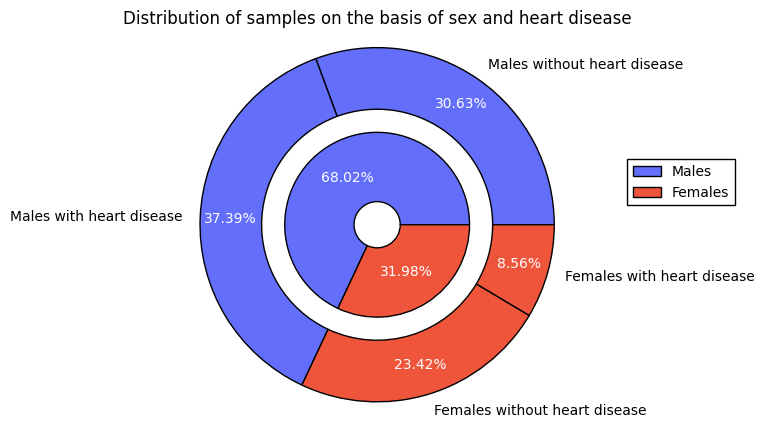

In [16]:
healthy_male_num = sex_num_crosstab.iloc[1, 0]
unhealthy_male_num = sex_num_crosstab.iloc[1, 1]
total_male_num = healthy_male_num + unhealthy_male_num

healthy_female_num = sex_num_crosstab.iloc[0, 0]
unhealthy_female_num = sex_num_crosstab.iloc[0, 1]
total_female_num = healthy_female_num + unhealthy_female_num

inner_values = [total_male_num, total_female_num]
inner_labels = ["Males", "Females"]
inner_colors = ["#636EFA", "#EF553B"]

outer_values = [healthy_male_num, unhealthy_male_num, healthy_female_num, unhealthy_female_num]
outer_labels = ["Males without heart disease", "Males with heart disease",
                "Females without heart disease", "Females with heart disease"]
outer_colors = ["#636EFA", "#636EFA", "#EF553B", "#EF553B"]

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(x=inner_values, colors=inner_colors, radius=0.6, autopct='%1.2f%%', pctdistance=0.6,
       wedgeprops=dict(edgecolor="black", width=0.45), textprops=dict(color="white"))

*_, autotexts = ax.pie(x=outer_values, colors=outer_colors, radius=1.15, autopct='%1.2f%%', pctdistance=0.83,
                       wedgeprops=dict(edgecolor="black", width=0.4), labels=outer_labels)

for autotext in autotexts:
    autotext.set_color("white")

ax.set(aspect="equal", title="Distribution of samples on the basis of sex and heart disease");

ax.legend(inner_labels, loc=(1.15, 0.55), framealpha=1, fancybox=False, edgecolor="black");

The number of male samples in the dataset is around twice the number of female samples. We also observe that only about a quarter of the female samples in the given dataset have heart disease, in contrast to the male samples where roughly half of them have heart disease. Let us now look at the age distribution of the male and female samples.

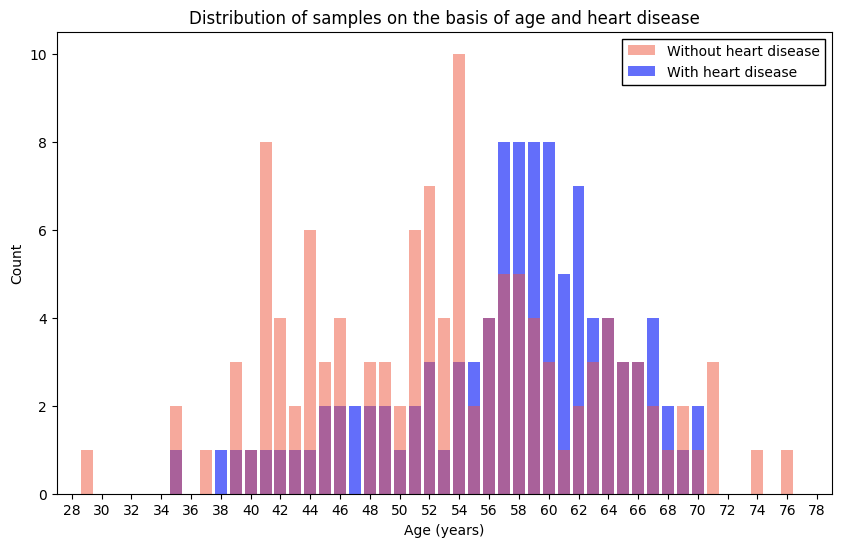

In [17]:
age_data_with_hd = heart_disease_train.loc[heart_disease_train["target"] == 1, "age"].value_counts()
age_data_without_hd = heart_disease_train.loc[heart_disease_train["target"] == 0, "age"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x=age_data_without_hd.index, height=age_data_without_hd.values,
       color="#EF553B", alpha=0.5, label="Without heart disease", zorder=1)

ax.bar(x=age_data_with_hd.index, height=age_data_with_hd.values,
       color="#636EFA", label="With heart disease", zorder=0)

ax.set(title="Distribution of samples on the basis of age and heart disease",
       xlabel="Age (years)", ylabel="Count", xlim=(27, 79), xticks=range(28, 80, 2))

ax.legend(fancybox=False, framealpha=1, edgecolor="black");

In the given dataset, we can see that the number of samples with heart disease is large for ages around 60 years. The mean age of male and female samples with and without heart disease is computed below:

In [18]:
pd.DataFrame(heart_disease_train.groupby(["sex", "target"])["age"].mean())

age
sex target           
0.0 0       55.865385
    1       60.789474
1.0 0       51.279412
    1       56.313253

On average, the age of a female sample is more than the age of a male sample, in both groups of samples (with heart disease and without heart disease). We shall proceed by analysing the relationship between the age and the maximum heart rate of the samples.

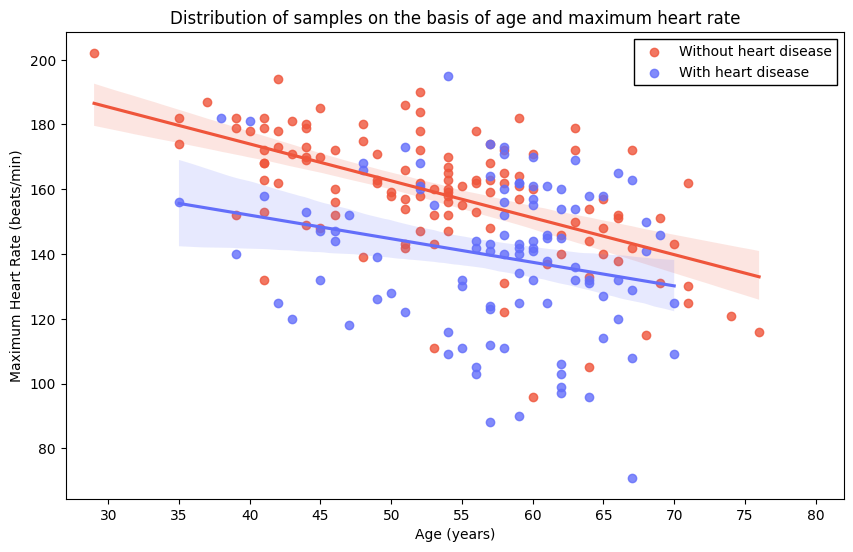

In [19]:
fig = sns.lmplot(data=heart_disease_train, x="age", y="thalach", hue="target", 
                 palette=["#EF553B", "#636EFA"], aspect=1.6, height=5.4, legend=False)

fig.set(title="Distribution of samples on the basis of age and maximum heart rate",
        xlabel="Age (years)", xlim=(27, 82), xticks=range(30, 81, 5),
        ylabel="Maximum Heart Rate (beats/min)");

sns.despine(top=False, right=False)

legend_data = [fig._legend_data['0'], fig._legend_data['1']]

legend_labels = ["Without heart disease", "With heart disease"]

plt.legend(handles=legend_data, labels=legend_labels, fancybox=False, framealpha=1, edgecolor="black");

The maximum heart rate of a sample decreases with the increase in age, irrespective of the existence of heart disease. The linear relationship between the various medical attributes are easily seen with the help of the following correlation matrix:

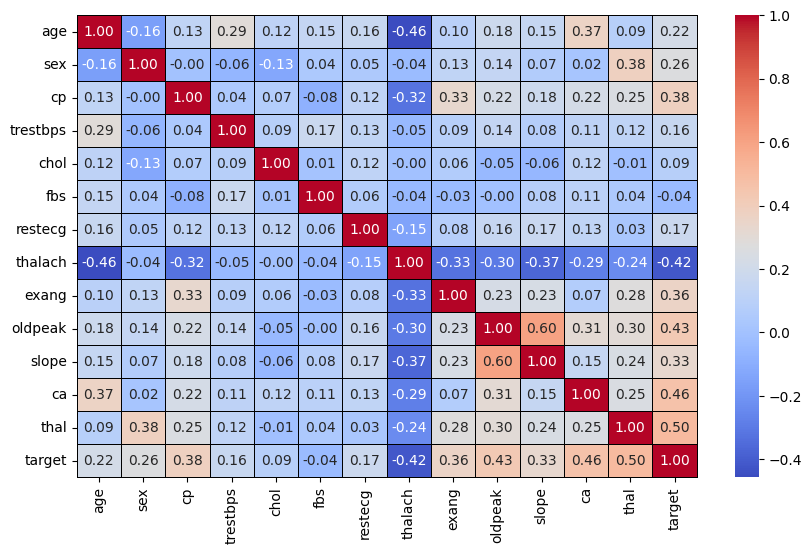

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(data=heart_disease_train.corr(), cmap="coolwarm", annot=True,
                 fmt=".2f", linewidth=0.5, linecolor="black", clip_on=False);

A high positive value implies a positive correlation and a high negative value implies a negative correlation.

## Modelling

Let us first perform feature scaling on the train and test sets using `StandardScalar`.

In [21]:
scalar = StandardScaler()

X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns)

The transformed `X_train` is shown below:

In [22]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.576011,0.685710,-1.212521,-0.695809,-1.988559,-0.439941,-0.975571,1.385661,-0.671551,-0.871791,-0.933387,-0.714379,-0.873673
1,-1.127311,0.685710,0.890445,-0.984429,0.269605,-0.439941,1.039097,1.515493,-0.671551,-0.871791,-0.933387,-0.714379,-0.873673
2,0.330967,-1.458342,0.890445,-0.118568,-1.111602,-0.439941,-0.975571,-0.821493,-0.671551,-0.360463,0.672907,-0.714379,-0.873673
3,0.330967,-1.458342,0.890445,-1.850290,0.006518,-0.439941,1.039097,-1.210991,-0.671551,-0.019578,0.672907,-0.714379,-0.873673
4,0.218792,0.685710,-1.212521,1.266809,-0.344265,-0.439941,1.039097,0.606665,-0.671551,-0.871791,-0.933387,0.328990,-0.873673


In [23]:
# create a dictionary to store performance scores of different models.
models_to_test_dict = {"SVC": SVC(random_state=random_state),
                       "LogisticRegression": LogisticRegression(random_state=random_state),
                       "RandomForestClassifier": RandomForestClassifier(random_state=random_state),
                       "KNeighborsClassifier": KNeighborsClassifier()}

f1_scores = {}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

Since the aim of the model is to predict the existence of heart disease, we want to minimize false negatives and maximize true positives. It is clearly better to have a lower number of false negatives than false positives. We shall use the F1 score as the evaluation metric.

In [24]:
for model_name, model in models_to_test_dict.items():
    f1_scores[model_name] = np.mean(cross_val_score(model, X_train, y_train, cv=skf, scoring="f1"))

In [25]:
baseline_predictions = pd.DataFrame(f1_scores, index=["F1 score"]).T

baseline_predictions

,F1 score
SVC,0.763768
LogisticRegression,0.815270
RandomForestClassifier,0.778885
KNeighborsClassifier,0.757877


The baseline predictions are visualized below:

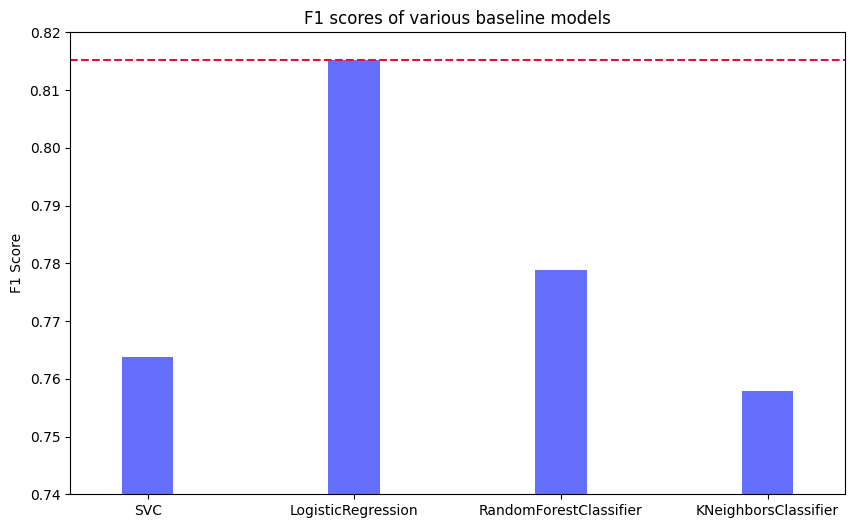

In [26]:
baseline_predictions.plot(kind="bar", figsize=(10, 6), color="#636EFA", ylim=(0.74, 0.82),
                          title="F1 scores of various baseline models",
                          rot=0, ylabel="F1 Score", width=0.25, legend=False)

plt.axhline(y=baseline_predictions["F1 score"].max(), linestyle="--", color="crimson");

We observe that LogisticRegression model performs the best among the chosen models in terms of F1 score. Therefore, we select the LogisticRegression model and proceed to tune its hyperparameters. The list of hyperparameters along with their default values can be seen using the `get_params` method.

In [27]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

GridSearchCV can be used to find optimal values for the hyperparameters of the model. The combination of values to test are given in the dictionary below:

In [28]:
param_grid = {"solver": ["lbfgs", "liblinear"],
              "C": np.logspace(-4, 4, 40),
              "tol": [1e-3, 1e-4, 1e-5]}

In [29]:
search_obj = GridSearchCV(estimator=LogisticRegression(random_state=random_state), cv=skf,
                          param_grid=param_grid, scoring="f1", n_jobs=-1, refit=True, verbose=1)

# fit the object on the train set.
search_obj.fit(X_train, y_train);

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


From all the possible combinations in `param_grid`, the best values for the hyperparameters are:

In [30]:
search_obj.best_params_

{'C': 0.19144819761699575, 'solver': 'lbfgs', 'tol': 0.001}

Let us now compare the performance of the baseline model and the tuned model. 

In [31]:
tuned_model = search_obj.best_estimator_

baseline_model = LogisticRegression(random_state=random_state)

In [32]:
models_dict = {"Baseline Model": baseline_model, "Tuned Model": tuned_model}

score_parameters = ["Accuracy", "Precision", "Recall", "F1"]

scores_df = pd.DataFrame(index=models_dict.keys(), columns=score_parameters)

for model_name in models_dict:
    for param in score_parameters:
        scores_list = cross_val_score(models_dict[model_name], X_train, y_train, cv=skf, scoring=param.lower())
        scores_df.loc[model_name, param] = np.mean(scores_list)
        
scores_df

,Accuracy,Precision,Recall,F1
Baseline Model,0.833131,0.85731,0.784762,0.81527
Tuned Model,0.842222,0.877481,0.775238,0.820091


Let's visualise the above model scores:

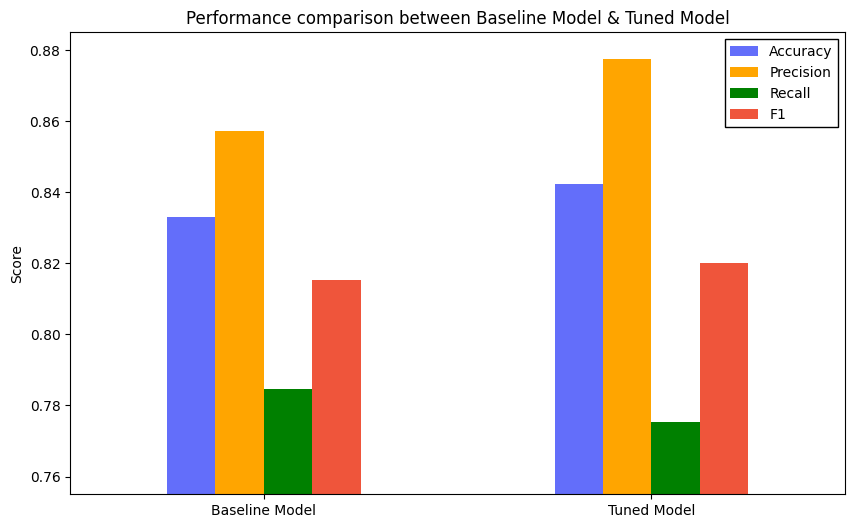

In [33]:
scores_df.plot(kind="bar", figsize=(10, 6), ylim=(0.755, 0.885), ylabel="Score",
               rot=0, color=["#636EFA", "orange", "green", "#EF553B"],
               title="Performance comparison between Baseline Model & Tuned Model")

plt.legend(fancybox=False, framealpha=1, edgecolor="black");

We shall now make predictions on the test set.

In [34]:
y_pred = tuned_model.predict(X_test)

train_set_score = tuned_model.score(X_train, y_train)
test_set_score = tuned_model.score(X_test, y_test)

print(f"Accuracy score of the tuned model's prediction on the train set: {train_set_score:.2%}")
print(f"Accuracy score of the tuned model's prediction on the test set: {test_set_score:.2%}")

Accuracy score of the tuned model's prediction on the train set: 86.04%
Accuracy score of the tuned model's prediction on the test set: 85.33%


The confusion matrix associated with the predictions made on the test set is:

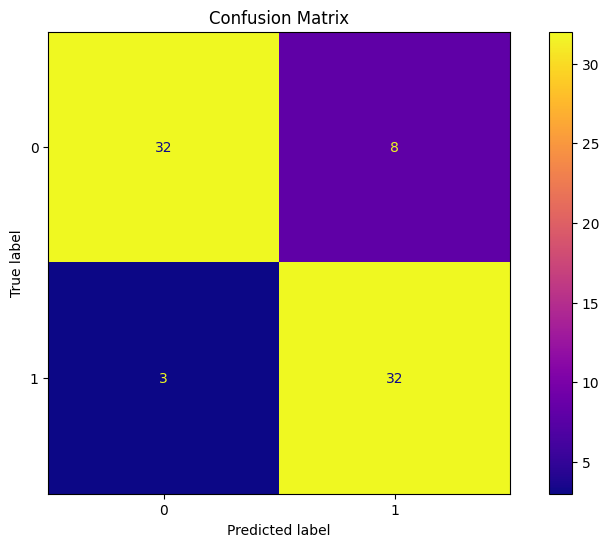

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="plasma", ax=ax);

The number of false negatives (3) is lower than the number of false positives (8). We can obtain a detailed report of the predictions made by the tuned model using `classification_report`.

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        40
           1       0.80      0.91      0.85        35

    accuracy                           0.85        75
   macro avg       0.86      0.86      0.85        75
weighted avg       0.86      0.85      0.85        75



The Receiver Operating Characteristic (ROC) curve that shows the performance of a classification model at all classification thresholds is shown below:

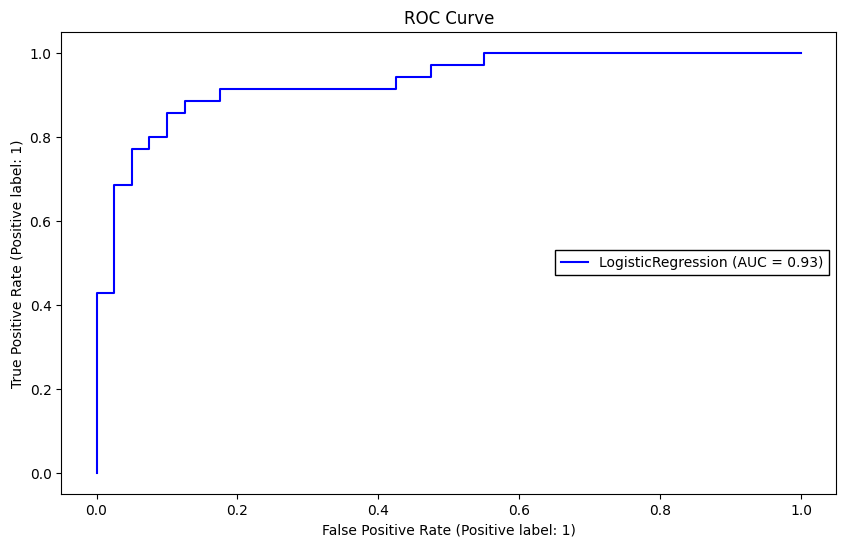

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("ROC Curve")

RocCurveDisplay.from_estimator(tuned_model, X_test, y_test, color="#0000FF", ax=ax);

plt.legend(loc="right", fancybox=False, framealpha=1, edgecolor="black");

Let us now inspect the important features in the dataset for making prediction. Since the features are standardized, the magnitude of the learnt coefficients directly reflect the importance of each feature.

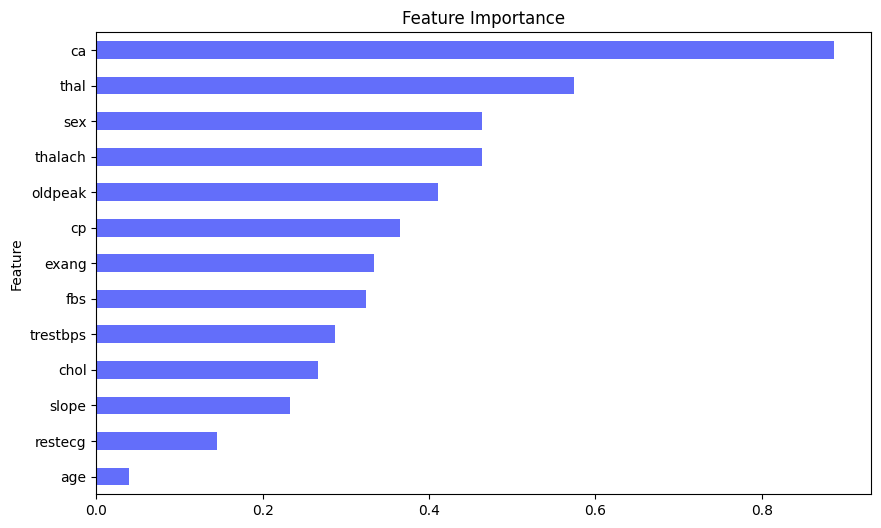

In [38]:
coefficients = tuned_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, "Importance": np.abs(coefficients)})

feature_importance.sort_values(by="Importance", ascending=True, inplace=True)

feature_importance.plot(x="Feature", y="Importance", kind="barh", color="#636EFA",
                        title="Feature Importance", figsize=(10, 6), legend=False);

Thus, the top 4 important features are `ca`, `thal`, `sex` and `thalach`. 